# **Lab experience #11 (SOLUTION): Clustering of a dataset with mixed data types**

This eleventh lab session aims **to cluster a dataset with mixed data types**. This lab session refers to all Prof. Stella's lectures on clustering.

In this lab session, you can **re-use code already developed in the past labs**, but you also need to implement some additional pre-processing steps, before going into the clustering part.

The lab session is divided into three main parts:

**Part 1**: Dataset loading and exploratory data analysis.

**Part 2**: Preprocessing (handling missing values and outliers, scaling, columns dropping if needed, ...).

**Part 3**: Clustering. For this part, you are required to **choose at least two clustering methods** to apply (among k-means++, hiearchical clustering, DBSCAN). You can decide to apply two or three of them. Also, you can decide whether it is better to apply them in sequence (see Lab06) or in parallel (i.e., you run them independently and choose the best result). Finally, you need to validate them in an unsupervised manner.

_No true labels will be provided this time during the lab._


## Useful references:

- [Manhattan distance](https://www.cs.cornell.edu/courses/JavaAndDS/files/manhattanDistance.pdf)

- [Jaccard's similarity and distance](https://en.wikipedia.org/wiki/Jaccard_index)

- [Gower's distance: Medium article](https://medium.com/analytics-vidhya/concept-of-gowers-distance-and-it-s-application-using-python-b08cf6139ac2)


- [Clustering mixed data types: Medium article](https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b)

- [Dimensionality reduction and clustering on mixed data types](https://towardsdatascience.com/famd-how-to-generalize-pca-to-categorical-and-numerical-data-2ddbeb2b9210)

## NOTATION:
To uniquely identify the number of clusters in the two/three different clustering solutions, please adhere to the following notation:

> ```
> Kh = number of clusters for the hierarchical clustering solution
> Km = number of clusters for the k-means++ clustering solution
> Kd = number of clusters for the DBSCAN clustering solution
> ```


For the labels assigned by the two/three algorithms, please name them as follows:
> ```
> hierarchical_labels = the labels assigend by the hierarchical clustering solution
> kmeans_labels       = the labels assigend by the k-means++ clustering solution
> dbscan_labels       = the labels assigend by the DBSCAN clustering solution
> ```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# **Part 1**: Dataset loading and exploratory data analysis

The dataset has attributes of mixed data types.

Legend for the attributes:

- **ID**: Customer’s unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Education Qualification of customer
- **Marital_Status**: Marital Status of customer
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **MntWines**: Amount spent on wine
- ...


Hint:
- ```.describe()```: it shows a comprehensive statistical description of the attributes
- ```.info()```: it returns the data type for each attribute and the number of non null elements
- ```.isna().sum()```: it counts the number of NaN for each attribute


In [2]:
# Load the dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Print the first part of the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
print(len(df))

2240


In [ ]:
# Compute the basic statistical properties of the dataset. Hint: .describe()
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [ ]:
# Check the data type for each attribute and the number of non null elements for every one
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Check the values of the categorical (dtype=object) attributes, the presence of _NaN_ values, possible _outliers_, and non-informative attributes (with no variability in the dataset).

In [ ]:
# Check occurrences of different categories for the categorial features
print(df["Marital_Status"].value_counts())
print("\n", df["Education"].value_counts())

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [ ]:
# Check for NaN values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# **Part 2:** Data preparation

The main objective of this part is to transform the dataset in order to have all attributes as numerical ones (to apply clustering).

**Note** the following:

- ```Marital_Status``` has a few records associated with unique categories (e.g., "Alone", "YOLO", "Absurd"). Rename them as "Single".

- ```Year_Birth``` has to be transformed into a numerical value. Then, replace this column with a new ```Age``` column with the corresponding value of the patient's age (reference year is 2024).

- ```Education``` and ```Marital_Status``` are categorical features (dtype=object). Then, we need to apply encoding to them.

- Reduce the number of columns by shrinking all expenses to a single new column named ```Total_Spent```. To do that, compute the total amount of spendings (any item, i.e., wine, fruits, gold, ...).

- ```Dt_Customer``` is type object in the format "dd-mm-yy". Hint: .```.to_datetime()``` to transform to a numerical value.

- ```Income``` has NaN values. They have to be removed. Hint: ```.dropna()```.

- features ```ID```, ```Z_CostContact``` and ```Z_Revenue``` are non-informative. Thus, they can be removed. Hint: ```.drop()```.

- remove recording with _outliers_: age can not exceed 100 years, income is most likely below 600000.

In [3]:
# Replace singleton categories
df["Marital_Status"].replace({'Alone': 'Single', 'Absurd': 'Single','YOLO':'Single'},inplace=True)

In [4]:
# Compute the age and replace it in the "Year-Birth" column
df['Year_Birth']= 2024-df['Year_Birth']
df.rename(columns={"Year_Birth": "Age"},inplace=True)
df.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,67,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,70,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,59,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,40,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,43,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Compute the total amount of spendings (any item) and group it into one column called "Total_Spent"
df["Total_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [6]:
# Transform "Dt_Customer" into a numerical attribute, by computing the number of days each customer engaged to the company
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, dayfirst=True)

newest_customer   = df['Dt_Customer'].max()
df['newest_customer'] = newest_customer

df['days_engaged'] = (df['newest_customer'] - df['Dt_Customer']).dt.days

# print(df['days_engaged'])
df.drop(columns=['Dt_Customer','newest_customer'],inplace=True)

In [ ]:
print(len(df))

2240


In [7]:
# Drop NaN values
df.dropna(inplace = True)

In [ ]:
print(len(df))    # this line removes some rows in the DataFrame (from 2240 to 2216 rows)

2216


In [8]:
# Dropping redundant features
df.drop(['ID','Z_CostContact','Z_Revenue'], axis=1, inplace = True)

<Figure size 800x550 with 0 Axes>

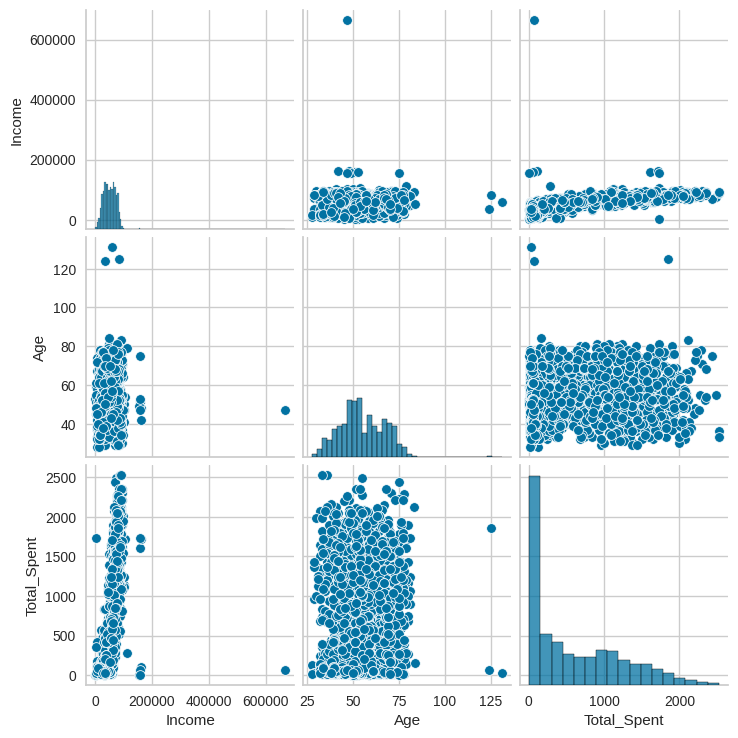

In [ ]:
# Outliers/Noise exploration. Hint: check documentation at https://seaborn.pydata.org/generated/seaborn.pairplot.html
plt.figure()
sns.pairplot(df[['Income', 'Age', "Total_Spent"]]) #, kind="hist") #checking on the relevant features
plt.show()

In [9]:
# Dropping the outliers (simplest way, by thresholding)
df = df[(df["Age"]<100)]
df = df[(df["Income"]<600000)]

In [ ]:
print(len(df))    # this line removes some rows in the DataFrame (from 2216 to 2212 rows)

2212


In [ ]:
# Check again the new dataset
df.describe(include='all')

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spent,days_engaged
count,2212.000000,2212,2212,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
unique,NaN,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1115,857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,55.086347,NaN,NaN,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,...,5.321429,0.073689,0.074141,0.072785,0.064195,0.013562,0.009042,0.150542,607.268083,353.714286
std,11.701599,NaN,NaN,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,...,2.425597,0.261323,0.262060,0.259842,0.245156,0.115691,0.094678,0.357683,602.513364,202.494886
min,28.000000,NaN,NaN,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,47.000000,NaN,NaN,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,180.000000
50%,54.000000,NaN,NaN,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,397.000000,356.000000
75%,65.000000,NaN,NaN,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1048.000000,529.000000


In [ ]:
# Check again the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2212 non-null   int64  
 1   Education            2212 non-null   object 
 2   Marital_Status       2212 non-null   object 
 3   Income               2212 non-null   float64
 4   Kidhome              2212 non-null   int64  
 5   Teenhome             2212 non-null   int64  
 6   Recency              2212 non-null   int64  
 7   MntWines             2212 non-null   int64  
 8   MntFruits            2212 non-null   int64  
 9   MntMeatProducts      2212 non-null   int64  
 10  MntFishProducts      2212 non-null   int64  
 11  MntSweetProducts     2212 non-null   int64  
 12  MntGoldProds         2212 non-null   int64  
 13  NumDealsPurchases    2212 non-null   int64  
 14  NumWebPurchases      2212 non-null   int64  
 15  NumCatalogPurchases  2212 non-null   int64 

In [ ]:
# num of samples after cleaning
print(len(df))

2212


# **Part 3**: Preprocessing

**Encode categorical features**
- use OrdinalEncoder for ordinal data
- use OneHotEncoder for nominal (unordered) data


_Note:_ OneHotEncoder function can be used instead of get_dummies function if your nominal features are integers.

In [10]:
# Encode ordinal features with OrdinalEncoder
education_order = ['Basic', '2n Cycle','Graduation','Master', 'PhD']
oe              = OrdinalEncoder(categories = [education_order], dtype=int)
education_oe    = oe.fit_transform(df[['Education']])
df_enc          = df.assign(Education_encode = education_oe)
print(df_enc.shape)
print(df_enc[['Education', 'Education_encode']])

(2212, 28)
       Education  Education_encode
0     Graduation                 2
1     Graduation                 2
2     Graduation                 2
3     Graduation                 2
4            PhD                 4
...          ...               ...
2235  Graduation                 2
2236         PhD                 4
2237  Graduation                 2
2238      Master                 3
2239         PhD                 4

[2212 rows x 2 columns]


In [11]:
# Encode nominal features with OneHotEncoder
ohe         =  OneHotEncoder(sparse = False, dtype = 'int')
Marital_ohe = ohe.fit_transform(df[['Marital_Status']])
Marital_ohe = pd.DataFrame(data = Marital_ohe, columns = ohe.get_feature_names_out(['Marital_Status']), index = df.index,)
df_enc      = pd.concat([df_enc, Marital_ohe], axis=1)

df_enc.drop(['Marital_Status','Education'], axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


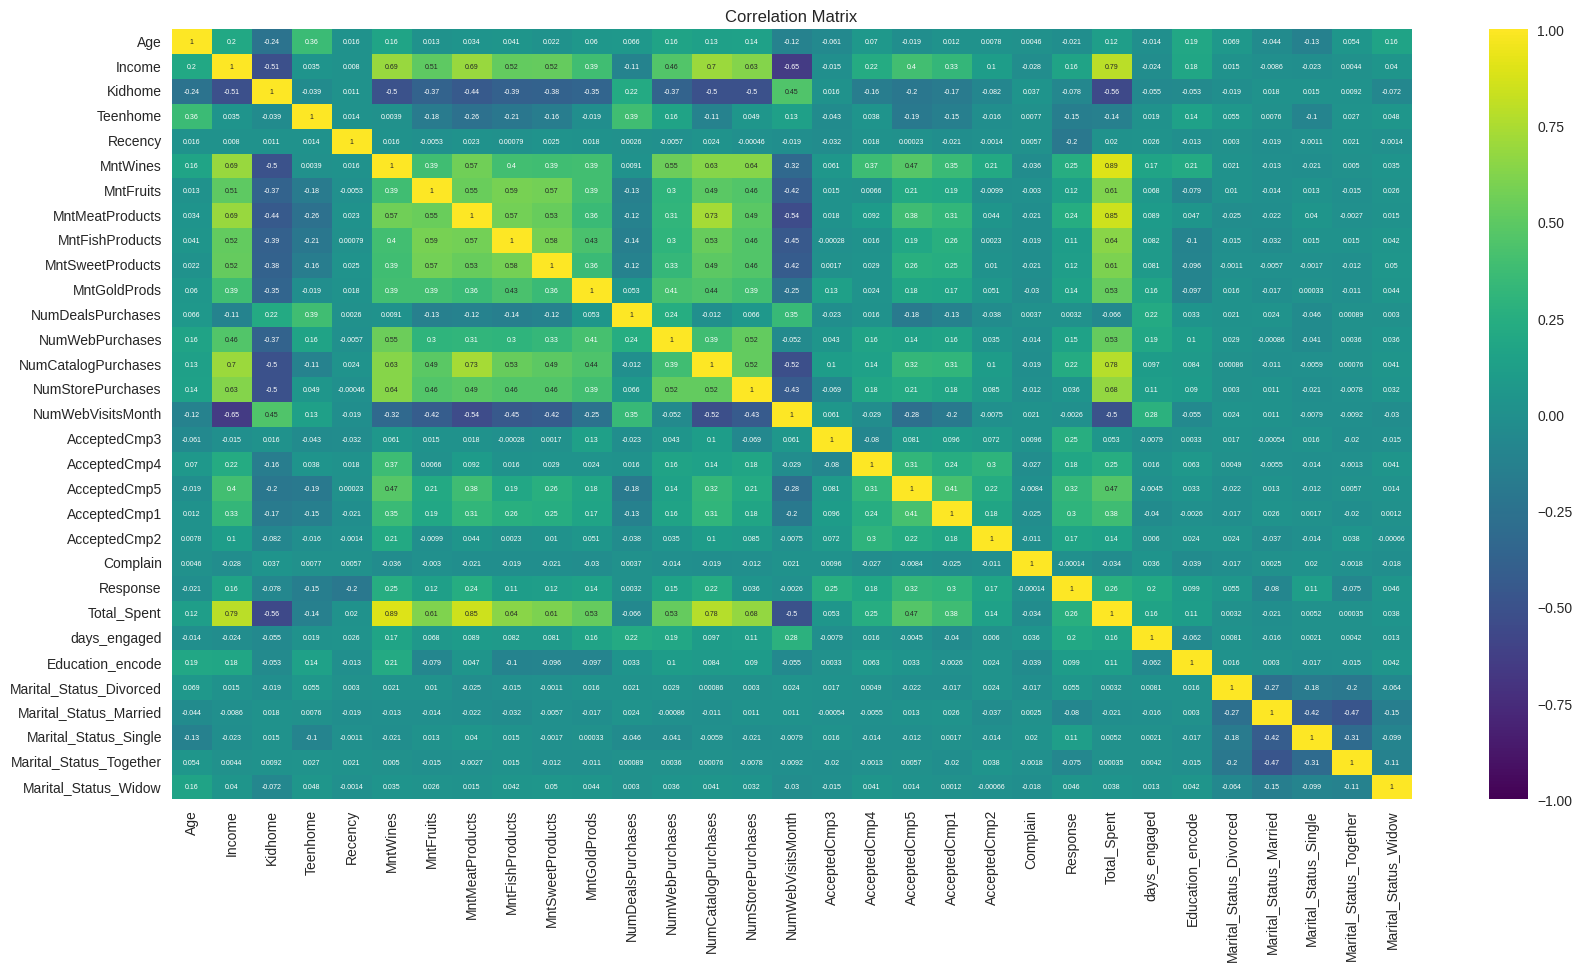

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df_enc.corr(method='pearson'), cmap='viridis', annot = True, annot_kws={"size": 5}, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Note** All features are now numerical. Be careful to use ```df_enc``` now on.



**Scaling**: Apply z-score (StandardScaler) on continuous variables.

In [ ]:
# binary (dummy) features do not require normalisation
binary_columns = ['Marital_Status_Divorced','Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Together','Marital_Status_Widow'
                 ,'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
binary_series = df_enc[binary_columns]  # 12 columns are binary

In [ ]:
# Part of the dataframe needing of scaling
df_to_scaler = df_enc.drop(columns=binary_columns)   # excluding binary attributes from df_enc, before scaling

#scaling the features
scaler = StandardScaler().fit_transform(df_to_scaler)    # StandardScaler reduces attributes in the range [0,1], comparable with binary attributes

#creating a new dataframe with numerical features scaled
scaled_df     = pd.DataFrame(scaler, columns = df_to_scaler.columns)   # subset of df_enc with continuous attributes scaled

In [ ]:
# Update the scaled dataframe by including the binary columns
scaled_df     = pd.concat([scaled_df.reset_index(drop=True), binary_series.reset_index(drop=True)], axis=1)    # check: https://stackoverflow.com/questions/50368145/pandas-concat-increases-number-of-rows

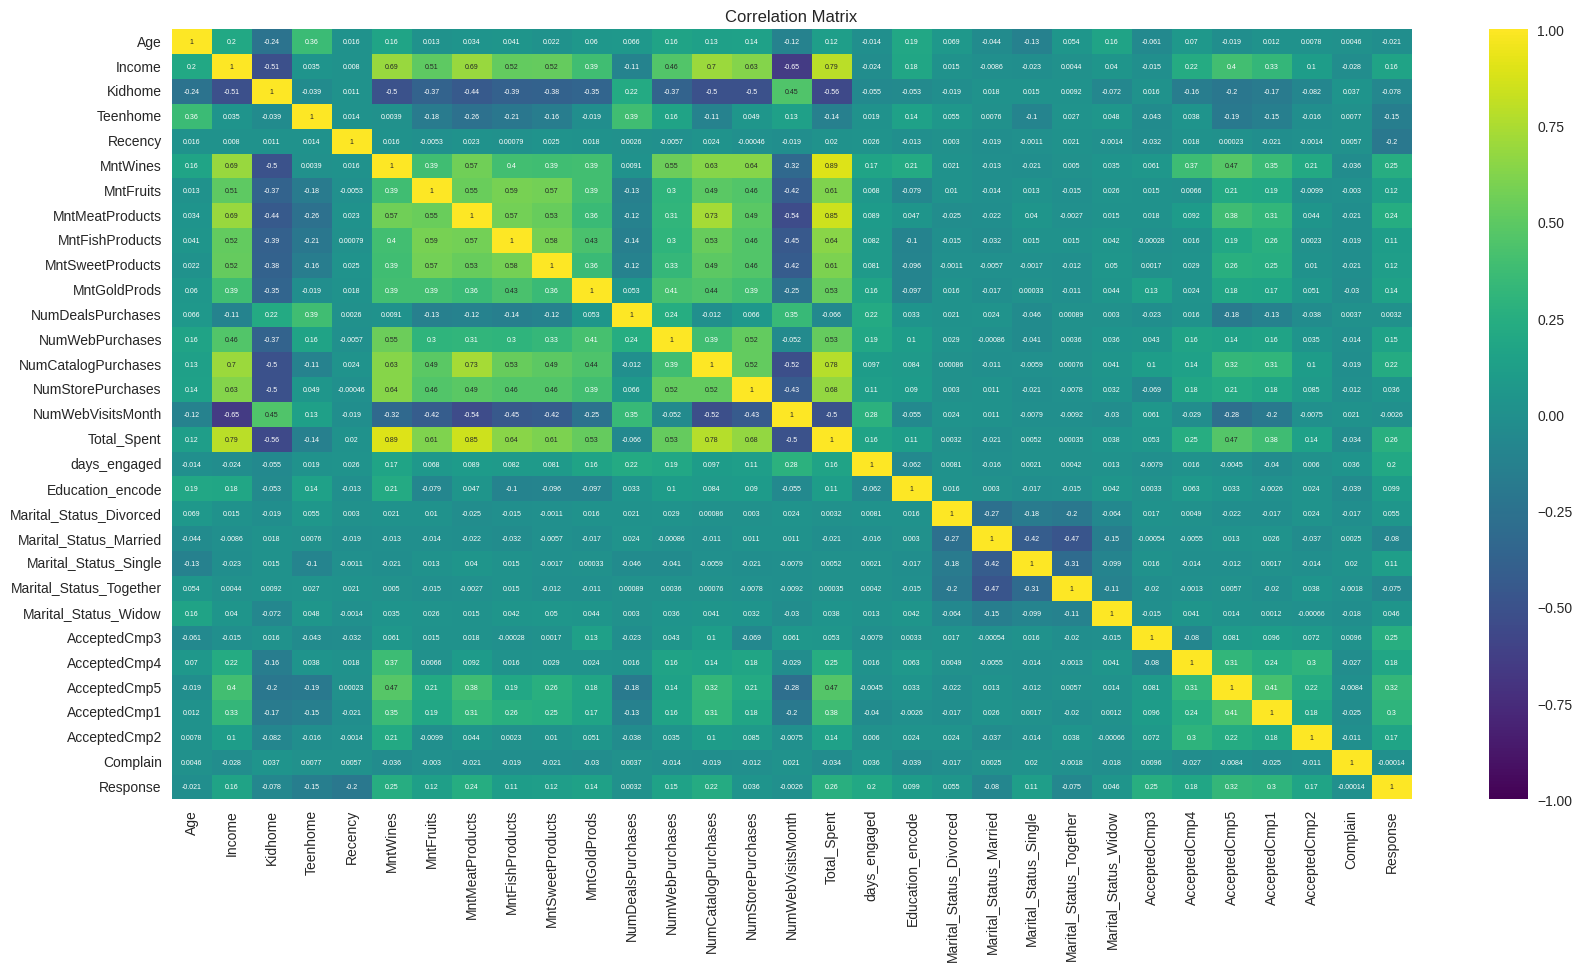

In [ ]:
# Plot the heatmap of the features pair-wise correlation in the new scaled dataframe. Hint: use sns.heatmap()
plt.figure(figsize=(20,10))
sns.heatmap(scaled_df.corr(method='pearson'), cmap='viridis', annot = True, annot_kws={"size": 5}, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Note** Be careful to use ```scaled_df``` now on.

# **Part 4:** Clustering

- remove mean, column-wise
- before going to clustering, apply dimensionality reduction (PCA)
- transform the dataframe into numpy to re-use code already developed in previous labs
- use the suggested palette

In [ ]:
# Remove mean column-wise
scaled_df = scaled_df - scaled_df.mean()

In [ ]:
# Apply PCA
NCOMP = 2
pca = PCA(n_components=NCOMP)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["PC1","PC2"]))

In [ ]:
# To numpy
X = PCA_df.to_numpy()
[N,M] = np.shape(X)

In [ ]:
# Colors palette for clusters
PAL = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'magenta', 'cyan', 'brown']

**Note** Be careful to use ```X``` now on.

#CLUSTERIZE THE DATASET

**k-means++ clustering**
- use the elbow method to choose the best number of clusters (Km)
- run k-means++ on the reduced dataset (with NCOMP components)
- find the clusters
- visualize the solution

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

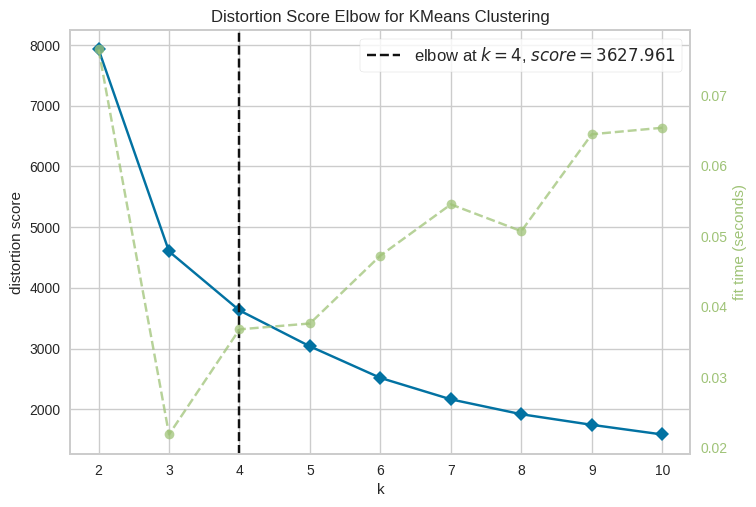

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Use the elbow method
Elbow_M = KElbowVisualizer(KMeans(), k=(2,11))
Elbow_M.fit(X)
Elbow_M.show()

In [ ]:
# Best number of clusters based on the elbow method
Km = 4

The final SSE is: 3627.97 


<ipython-input-29-308bb0e80a9d>:8: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmeans.labels_, palette=PAL)


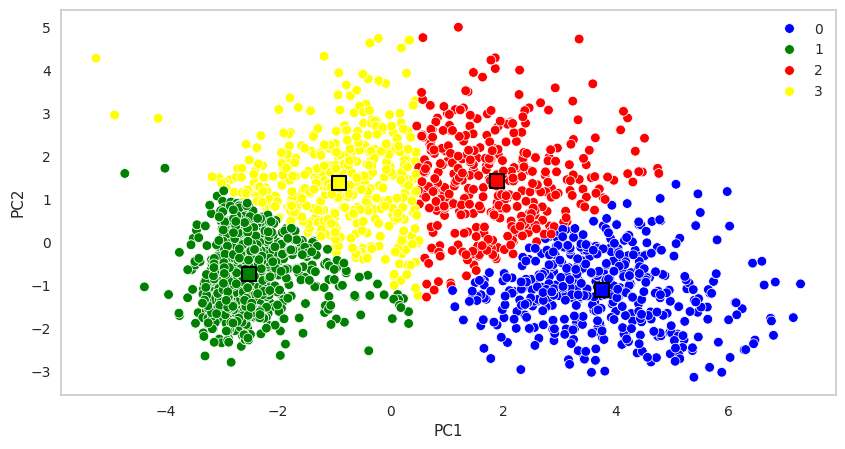

In [ ]:
# Apply k-means++
kmeans = KMeans(n_clusters=Km, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=30).fit(X)

print('The final SSE is: %.2f '% kmeans.inertia_)

# Scatterplot
fig11 = plt.figure('kmeans', figsize=(10,5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmeans.labels_, palette=PAL)
for k in range(Km):
  plt.scatter(x=kmeans.cluster_centers_[k,0], y=kmeans.cluster_centers_[k,1], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)
sns.set_theme(style='dark')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [ ]:
# Validation
# ----------
from sklearn.metrics import silhouette_score

# choose the distance metric
distance_metric = 'euclidean'

# Compute intra- and inter-cluster distances (dm, Dm). Hint: use the utility function below
[dm, Dm] = intra_inter_cluster_distances(X, Km, kmeans.labels_, kmeans.cluster_centers_, distance_metric)


# Silhouette score
Sm = silhouette_score(X, kmeans.labels_, metric=distance_metric)
print("\nWith k-means clustering, we found an optimal number of clusters equal to Km=%d with a silhouette score of S=%.3f." % (Km, Sm))

The intra-cluster distance of the clusters are:  [1.8  1.24 1.8  1.74]

All pair-wise inter-cluster distances:
 [[0.   6.27 3.15 5.29]
 [6.27 0.   4.91 2.65]
 [3.15 4.91 0.   2.81]
 [5.29 2.65 2.81 0.  ]]

With k-means clustering, we found an optimal number of clusters equal to Km=4 with a silhouette score of S=0.440.


**Hierarchical clustering**

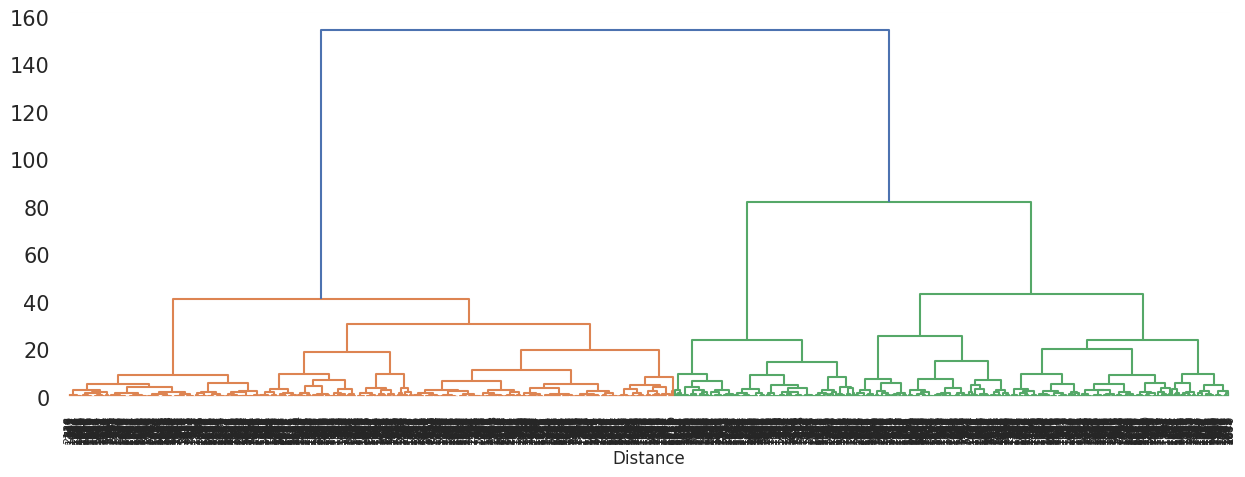

In [ ]:
# Import useful packages for clustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf

# Choose the main algorithm parameters
method_merging = 'ward'
distance_metric = 'euclidean'

# Apply the algorithm to obtain the hierarchy
Z = hierarchy.linkage(X, method_merging, metric=distance_metric, optimal_ordering='true')

# Visualize the dendrogram
fig21 = plt.figure(figsize=(15, 5))
dn = hierarchy.dendrogram(Z, no_plot=0)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tick_params(axis='x', which='major', labelsize=8)
plt.xlabel('Distance')
plt.grid()
plt.show()

(2212,)
[2 0 2 ... 2 2 0]
We got 3 cluster(s).


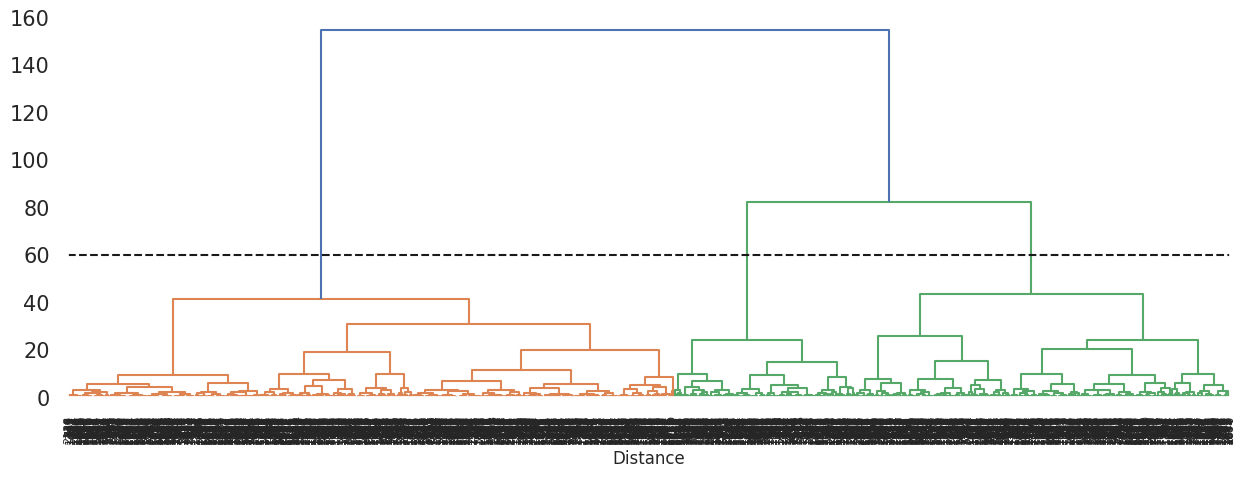

3 centroids are being computed, as we have 3 clusters.
The centroid of cluster 0 has coordinates:  -2.2 -0.3
The centroid of cluster 1 has coordinates:  0.65 2.23
The centroid of cluster 2 has coordinates:  3.24 -0.57

We need to compute 3 centroids, as we have 3 clusters.


In [ ]:
# Cut the forest to have a certain inter-cluster distance (max_d)
max_d = 60

# Form the clusters. Note: subtract 1 in order for the labels to start from 0 (as it happens in k-means++)
hierarchical_labels = fcluster(Z, max_d, criterion='distance') - 1

print(hierarchical_labels.shape)
print(hierarchical_labels)

# Confirm that you cut correctly, to have N clusters
Kh = hierarchical_labels.max() + 1
print("We got %d cluster(s)." % Kh)


# Add a vertical line to the dendrogram indicating the cut
plt.figure(fig21)
plt.axhline(y=max_d, color='k', linestyle='--')
plt.show()

# Find clusters centers. Hint: utility function below
hierarchical_centers = find_cluster_centers(X, Kh, hierarchical_labels)
print("\nWe need to compute %d centroids, as we have %d clusters." % (Kh, Kh) )

The intra-cluster distance of the clusters are:  [1.71 1.73 2.28]

All pair-wise inter-cluster distances:
 [[0.   3.81 5.45]
 [3.81 0.   3.82]
 [5.45 3.82 0.  ]]

With hierarchical clustering, we found an optimal number of clusters equal to Kh=3 with a silhouette score of Sh=0.478.


<ipython-input-36-5df37ce5305a>:16: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(x=X[:,0], y=X[:,1], hue=hierarchical_labels, palette=PAL)


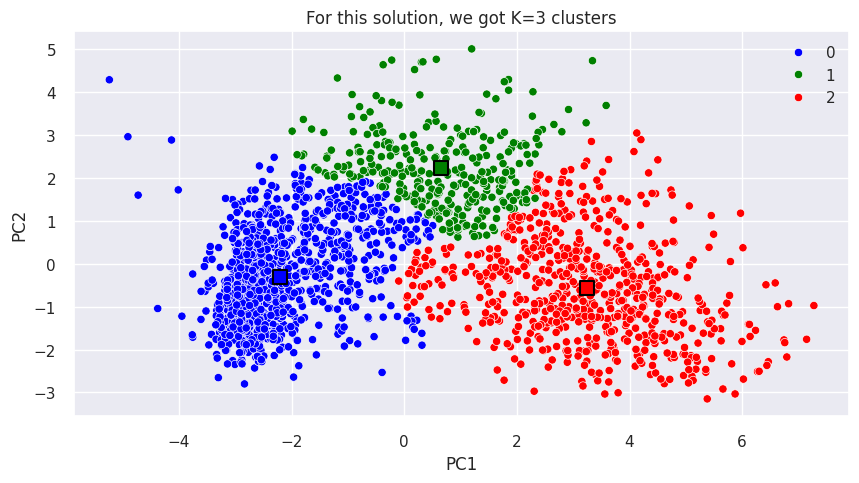

In [ ]:
# Validation
# ----------

# Compute intra- and inter-cluster distances (dh, Dh). Hint: use the utility function below
[dh, Dh] = intra_inter_cluster_distances(X, Kh, hierarchical_labels, hierarchical_centers, distance_metric)


# Silhouette score
Sh = silhouette_score(X, hierarchical_labels, metric=distance_metric)
print("\nWith hierarchical clustering, we found an optimal number of clusters equal to Kh=%d with a silhouette score of Sh=%.3f." % (Kh, Sh))



# Visualize this clustering solution
fig21 = plt.figure('Hierarchical clustering (dendrogram cut at %.2f)' % max_d, figsize=(10,5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=hierarchical_labels, palette=PAL)
for k in range(Kh):
   plt.scatter(x=hierarchical_centers[k,0], y=hierarchical_centers[k,1], s=100, marker='s', edgecolor='black', linewidth=1.5, color=PAL[k])
sns.set_theme(style='dark')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("For this solution, we got K=%d clusters" % Kh)
plt.grid()
plt.show()

**DBSCAN clustering**

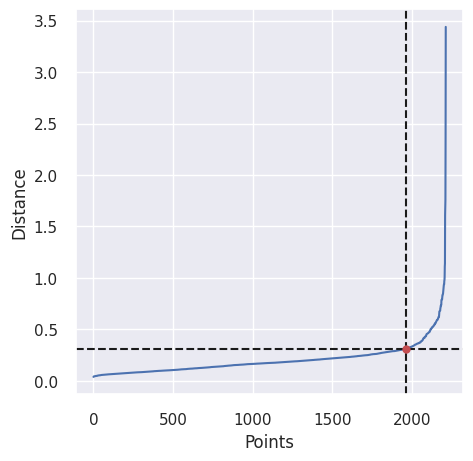

We got 2 cluster(s).
[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors as knn
!pip install kneed                   # run this line only the first time you run this cell
from kneed import KneeLocator



# Knee method
neighborhood_order = 7
neighborhood_set   = knn(n_neighbors=neighborhood_order).fit(X)
distances, indices = neighborhood_set.kneighbors(X)
distances          = np.sort(distances[:,neighborhood_order-1], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
knee_x = knee.knee
knee_y = knee.knee_y



fig31 = plt.figure(figsize=(5,5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()
plt.axvline(x=knee_x, color='k', linestyle='--')
plt.axhline(y=knee_y, color='k', linestyle='--')
plt.plot((knee_x), (knee_y), 'o', color='r')
plt.show()


# Apply DBSCAN
dbscan = DBSCAN(eps=knee_y, min_samples=6, metric='euclidean').fit(X)
dbscan_labels = dbscan.labels_

# find the number of clusters formed by the algorithm
unique_labels = np.unique(dbscan_labels)
Kd = len(unique_labels) - (1 if -1 in dbscan_labels else 0)
print("We got %d cluster(s)." % Kd)
print(dbscan_labels)

In [ ]:
# Find clusters centers. Hint: utility function below
dbscan_centers = find_cluster_centers(X, Kd, dbscan_labels)
print("\nWe need to compute %d centroids, as we have %d clusters." % (Kd, Kd) )

2 centroids are being computed, as we have 2 clusters.
The centroid of cluster 0 has coordinates:  -0.12 -0.07
The centroid of cluster 1 has coordinates:  4.48 1.6

We need to compute 2 centroids, as we have 2 clusters.


The intra-cluster distance of the clusters are:  [3.56 0.32]

All pair-wise inter-cluster distances:
 [[0.   4.89]
 [4.89 0.  ]]

With DBSCAN clustering, we found an optimal number of clusters equal to Kd=2 with a silhouette score of Sd=0.140.


<ipython-input-40-5d4771f0a41d>:16: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(x=X[:,0], y=X[:,1], hue=dbscan_labels, palette=PAL)


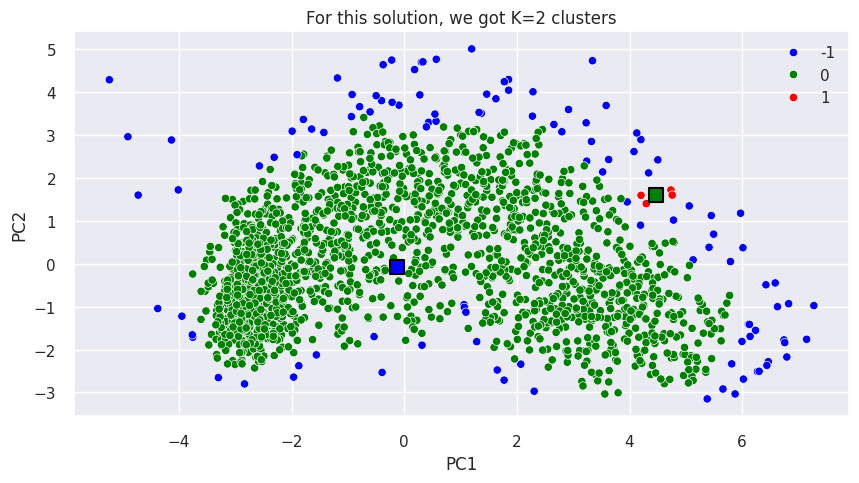

In [ ]:
# Validation
# ----------

# Compute intra- and inter-cluster distances (dd, Dd). Hint: use utility function below
[dd, Dd] = intra_inter_cluster_distances(X, Kd, dbscan_labels, dbscan_centers, distance_metric)


# Silhouette score
Sd = silhouette_score(X, dbscan_labels, metric=distance_metric)
print("\nWith DBSCAN clustering, we found an optimal number of clusters equal to Kd=%d with a silhouette score of Sd=%.3f." % (Kd, Sd))



# Visualize this clustering solution
fig31 = plt.figure('DBSCAN clustering', figsize=(10,5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=dbscan_labels, palette=PAL)
for k in range(Kd):
   plt.scatter(x=dbscan_centers[k,0], y=dbscan_centers[k,1], s=100, marker='s', edgecolor='black', linewidth=1.5, color=PAL[k])
sns.set_theme(style='dark')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("For this solution, we got K=%d clusters" % Kd)
plt.grid()
plt.show()

**Note.** As it might be expected, since clusters are partially overlapping with similar densities, DBSCAN is the least effective clustering algorithm (no matter combination of parameters you select).

**Compare clustering solutions**

In [ ]:
from sklearn import metrics
y1 = hierarchical_labels   # predicted labels from hierarchical clustering
y2 = kmeans.labels_        # predicted labels from k-means clustering
y3 = dbscan_labels         # predicted labels from DBSCANs clustering


print("Hierarchical vs kMeans clustering:")
print(f"Homogeneity: {metrics.homogeneity_score(y1, y2):.3f}")
print(f"Completeness: {metrics.completeness_score(y1, y2):.3f}")
print(f"V-measure: {metrics.v_measure_score(y1, y2):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y1, y2):.3f}")
print("Adjusted Mutual Information:" f" {metrics.adjusted_mutual_info_score(y1, y2):.3f}")

print("\n")

print("Hierarchical vs DBSCAN clustering:")
print(f"Homogeneity: {metrics.homogeneity_score(y1, y3):.3f}")
print(f"Completeness: {metrics.completeness_score(y1, y3):.3f}")
print(f"V-measure: {metrics.v_measure_score(y1, y3):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y1, y3):.3f}")
print("Adjusted Mutual Information:" f" {metrics.adjusted_mutual_info_score(y1, y3):.3f}")

print("\n")

print("kMeans vs DBSCAN clustering:")
print(f"Homogeneity: {metrics.homogeneity_score(y2, y3):.3f}")
print(f"Completeness: {metrics.completeness_score(y2, y3):.3f}")
print(f"V-measure: {metrics.v_measure_score(y2, y3):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y2, y3):.3f}")
print("Adjusted Mutual Information:" f" {metrics.adjusted_mutual_info_score(y2, y3):.3f}")

Hierarchical vs kMeans clustering:
Homogeneity: 0.699
Completeness: 0.519
V-measure: 0.596
Adjusted Rand Index: 0.560
Adjusted Mutual Information: 0.596


Hierarchical vs DBSCAN clustering:
Homogeneity: 0.020
Completeness: 0.090
V-measure: 0.033
Adjusted Rand Index: 0.041
Adjusted Mutual Information: 0.032


kMeans vs DBSCAN clustering:
Homogeneity: 0.011
Completeness: 0.067
V-measure: 0.019
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.017


# _This it the end of Lab session #11_ ✅


# Utility functions

In [ ]:
# [FROM SOLUTION OF LAB#4] THIS IS A **METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO find visualize data in 2D with clusters in different colours

def PCA_tSNE_visualization(data2visualize, NCOMP, LABELS, PAL):

  '''
  INPUT
  data2visualize    - data matrix to visualize
  NCOMP             - no. of components to decompose the dataset during PCA
  LABELS            - labels given by the clustering solution
  PAL               - palette of colours to distinguish between clusters
  '''

  '''
  OUTPUT
  Two figures: one using PCA and one using tSNE
  '''


  # PCA
  from sklearn.decomposition import PCA
  pca = PCA(n_components=NCOMP)
  pca_result = pca.fit_transform(data2visualize)
  print('PCA: explained variation per principal component: {}'.format(pca.explained_variance_ratio_.round(2)))

  # tSNE
  from sklearn.manifold import TSNE
  print('\nApplying tSNE...')
  np.random.seed(100)
  tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=300)
  tsne_results = tsne.fit_transform(data2visualize)


  # Plots
  fig1000 = plt.figure(figsize=(10,5))
  fig1000.suptitle('Dimensionality reduction of the dataset', fontsize=16)


  # Plot 1: 2D image of the entire dataset
  ax1 = fig1000.add_subplot(121)
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
  ax1.set_xlabel('Dimension 1', fontsize=10)
  ax1.set_ylabel('Dimension 2', fontsize=10)
  ax1.title.set_text('PCA')
  plt.grid()

  ax2= fig1000.add_subplot(122)
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)
  ax2.set_xlabel('Dimension 1', fontsize=10)
  ax2.set_ylabel('Dimension 2', fontsize=10)
  ax2.title.set_text('tSNE')
  plt.grid()
  plt.show()

In [ ]:
# [FROM SOLUTION OF LAB#3] THIS IS A **METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO compute the intra- and inter-cluster distances

def intra_inter_cluster_distances(data, K, labels, cluster_centers, distance_metric):

  '''
  INPUT
  data            - data matrix for which to compute the proximity matrix
  K               - the expected number of clusters
  labels          - predicted labels from the clustering solution applied to data
  cluster_centers - cluster centres from the clustering solution applied to data
  distance_metric - metric to compute the distances within and between clusters. Here, you use the same metric for both measurements (but it might be possible to use two different metrics)
  '''

  '''
  OUTPUT
  d               - intra-cluster distance
  D               - inter-cluster distances
  '''

  from scipy.spatial.distance import pdist as pdist
  from scipy.spatial.distance import squareform as sf


  # Intra-cluster distances (average over all pairwise distances) ----------------- NOTE: bug fixed here!
  PM = pdist(data, metric=distance_metric)
  PM = sf(PM).round(2)

  d = np.zeros(K)
  for k in range(K):
    ind = np.array( np.where(labels == k ) )
    for r in range(ind.size):
      d[k] = d[k] + np.sum( PM[ [ind[0][r]], [ind] ] )
    d[k] = d[k]/2                                          # not to consider pairs of pair-wise distance between objects twice (the PM is symmetric)
    d[k] = d[k]/( (ind.size*(ind.size-1)) / 2 )            # to compute the average among N*(N-1)/2 possible unique pairs
  print("The intra-cluster distance of the clusters are: ", d.round(2))


  # Inter-cluster distance ---------------------------------------------------
  D = pdist(cluster_centers, metric=distance_metric)
  D = sf(D).round(2)
  print("\nAll pair-wise inter-cluster distances:\n", D)

  return d, D

In [ ]:
# [FROM SOLUTION OF LAB#2] THIS IS A **METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO find cluster centers

def find_cluster_centers(data, K, labels):

  '''
  INPUT
  data    - data matrix for which to compute the proximity matrix
  K       - the expected number of clusters
  labels  - predicted labels from the clustering solution applied to data
  '''

  '''
  OUTPUT
  cluster_centers   - cluster centres from the clustering solution applied to data
  '''

  # Initialize the output
  cluster_centers = np.zeros((K, np.shape(data)[1]))   # np.shape(data)[1] = no. of attributes

  print("%d centroids are being computed, as we have %d clusters." % (K, K) )

  for k in range(0, K):
    ind = np.array( np.where( labels == k ) )
    cluster_points = data[ind, :][0]
    cluster_centers[k,:] = np.mean(cluster_points, axis=0) # cluster_points.mean(axis=0)
    print("The centroid of cluster %d has coordinates: " % (k), *cluster_centers[k,:].round(2))

  return cluster_centers